In [18]:
import os
import json
import matplotlib.pyplot as plt

In [21]:
k_list = [i for i in range(1,26)]
BLEU_score = []
BP = []
data_list = []

for k in k_list:
    path = f"./{k}/beamsearch_k{k}.txt"
    with open(path, "r") as f:
        data = json.load(f)
        data_list.append(data)
        BP.append(data["verbose_score"].split('BP = ')[1].split(' ')[0])
        BLEU_score.append(data['score'])

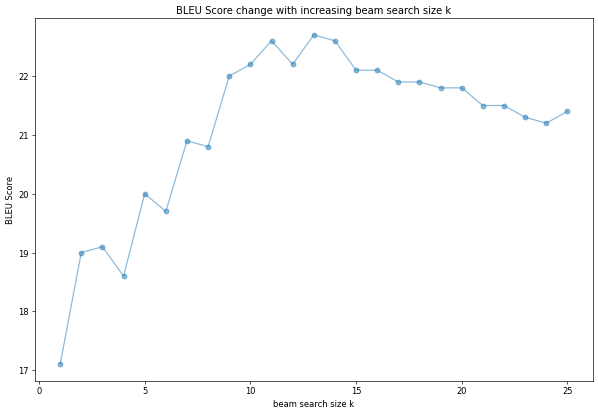

In [33]:
plt.figure(figsize=(12, 8), dpi=60)
plt.title("BLEU Score change with increasing beam search size k") 
plt.xlabel('beam search size k')
plt.ylabel('BLEU Score')
plt.plot(k_list, BLEU_score, marker = "o", alpha = 0.5)

Text(0, 0.5, 'BP')

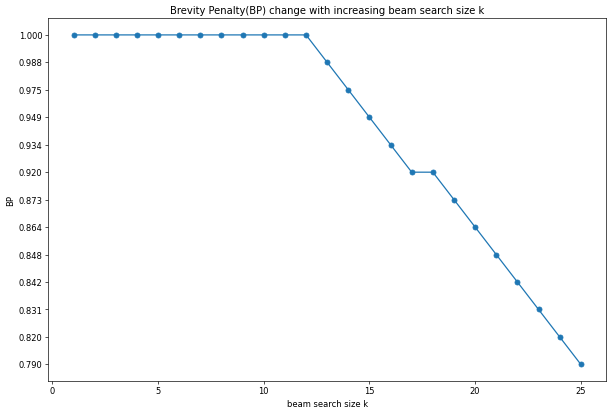

In [36]:
plt.figure(figsize=(12, 8), dpi=60)
plt.title("Brevity Penalty(BP) change with increasing beam search size k") 
plt.plot(k_list, BP, marker = "o")
plt.gca().invert_yaxis()
plt.xlabel('beam search size k')
plt.ylabel('BP')

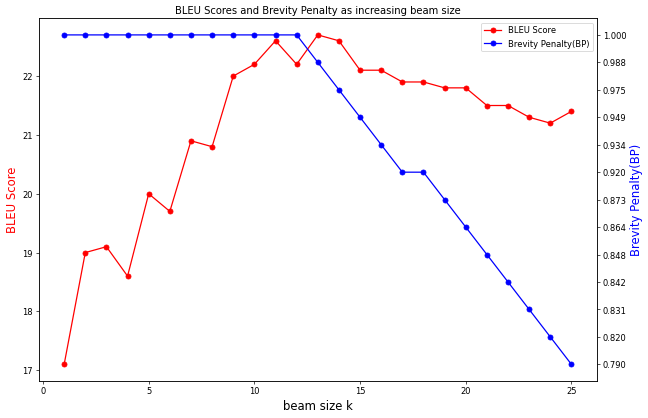

In [56]:
# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(12, 8), dpi=60)

# make a plot
bleu = ax.plot(k_list, BLEU_score, color="red", marker="o", label = "BLEU Score")
# set x-axis label
ax.set_xlabel('beam size k', fontsize = 14)
# set y-axis label
ax.set_ylabel("BLEU Score", color="red", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.invert_yaxis()
# make a plot with different y-axis using second axis object
bp = ax2.plot(k_list, BP, color="blue", marker="o", label = "Brevity Penalty(BP)")
ax2.set_ylabel("Brevity Penalty(BP)",color="blue",fontsize=14)
# added these three lines
lns = bleu+bp
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax2.set_title("BLEU Scores and Brevity Penalty as increasing beam size")

plt.show()
# save the plot as a file
fig.savefig('Q1_plot.jpg',
            format='jpeg',
            dpi=100, bbox_inches='tight')